## Fraud Detection For Card-not-present (CNP) Payment Transactions 

Nichakorn Pansailom

In [1]:
conda install -c conda-forge imbalanced-learn

^C

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Installed libraries for many helpful analytics 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans


# 1. Load Dataset

In [3]:
pd.set_option("display.max_columns",None)
pd.get_option("display.max_columns")

pd.set_option("display.max_rows",None)
pd.get_option("display.max_rows")

In [4]:
train_selected = pd.read_csv(r'D:\UW\Machine Learning in Finance I\Python\Project\train_selected.csv')

In [5]:
train_selected.shape

(590538, 70)

In [6]:
train_selected.head(10)

,isFraud,V4,V2,V8,V6,V1,V10,V11,D11,addr1,addr2,D7,D12,D14,id_10,id_09,D9,id_03,id_04,id_20,V313,V315,V314,V319,V135,V321,V317,V169,V175,V174,id_11,id_17,id_01,D13,D6,V5,V3,V7,V2.1,V150,V145,V152,V151,V144,V161,V138,V141,V142,V153,card1,card2,card3,dist1,dist2,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card6_credit,card6_debit,R_emaildomain_anonymous.com,R_emaildomain_gmail.com,R_emaildomain_hotmail.com,R_emaildomain_yahoo.com,P_emaildomain_anonymous.com,P_emaildomain_aol.com,P_emaildomain_gmail.com,P_emaildomain_hotmail.com,P_emaildomain_yahoo.com
0,0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,13.0,315.0,87.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1.0,1.0,1.0,1.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,13926,-999.0,150.0,19.0,-999.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,325.0,87.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,2755,404.0,150.0,-999.0,-999.0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
2,0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,315.0,330.0,87.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1.0,1.0,1.0,1.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,4663,490.0,150.0,287.0,-999.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,476.0,87.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,0.0,0.0,0.0,0.0,0.0,1404.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,18132,567.0,150.0,-999.0,-999.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
4,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,420.0,87.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,144.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,166.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1803.0,140.0,64.0,49.0,18.0,0.0,0.0,0.0,0.0,0.0,4497,514.0,150.0,-999.0,-999.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
5,0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,272.0,87.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1.0,1.0,1.0,1.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,5937,555.0,150.0,36.0,-999.0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
6,0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,126.0,87.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1.0,1.0,1.0,1.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,12308,360.0,150.0,0.0,-999.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
7,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,325.0,87.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,12695,490.0,150.0,-999.0,-999.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
8,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,337.0,87.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,166.0,-5.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1804.0,140.0,64.0,49.0,18.0,0.0,0.0,0.0,0.0,0.0,2803,100.0,150.0,-999.0,-999.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
9,0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,302.0,204.0,87.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,0.0,495.0,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1.0,1.0,1.0,1.0,-999.0,-999.0,-

## 2. Plot Feature Importances Graph

In [7]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 20 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:20]))), 
            df['importance_normalized'].head(20), 
            align = 'center', edgecolor = 'k',color='blue',alpha=0.7)
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:20]))))
    ax.set_yticklabels(df['feature'].head(20))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

# 3. Prepare and Scale Dataset

## 3.1. Split features and label

In [7]:
y = train_selected.iloc[:, 0].values
x = train_selected.iloc[:, 1:80].values

## 3.2. Using SMOTE to handle imbalance data


In [8]:
smote = SMOTE()

In [9]:
x_smote, y_smote = smote.fit_resample(x, y)

## 3.3. Scale the data using Standard Scaler

For ML algorithms, it is crucial to scale the data before training, as features using different scales will distort the results.

In [10]:
#Scale the data
sc = StandardScaler()
x_smote = sc.fit_transform(x_smote)

## 3.4. Split Train and Test

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = .3, random_state = 10)

# 4. Model Building

We want to experiment our data with many models to observe how these models/ algorithms perform in big dataset. Therefore, we decide to solve our problem using the models as shown below:

**a. Fraud detection using unlabeled data**
> K-Means clustering

**b. Fraud detection using labeled data**
> Logistic Regression\
  SVM\
  Decision Tree\
  KNN\
  Random Forest

## 4.1.Fraud detection using unlabeled data

### 4.1.1. K-means clustering

#### 4.1.1.1. Find the optimal number of clusters

In [43]:
# Define the range of clusters to try
clustno = range(1, 10)

# Run MiniBatch Kmeans over the number of clusters
kmeans = [MiniBatchKMeans(n_clusters=i) for i in clustno]

# Obtain the score for each model
score = [kmeans[i].fit(x_train).score(x_train) for i in range(len(kmeans))]

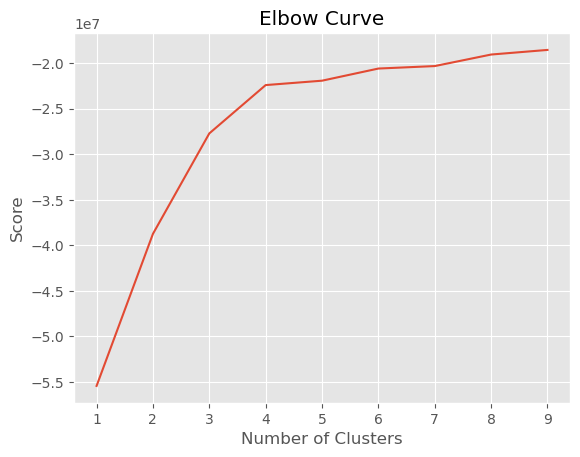

In [44]:
# Plot the models and their respective score 
plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

From the graph of n_cluster vs Score, optimal n_cluster should be 5, which is the cutoff of the curve. This elbow methods is known that the score further than the elbow is not providing any better score.

#### 4.1.1.2. Build and train K-means clustering

In [49]:
# Define K-means model 
kmeans = MiniBatchKMeans(n_clusters=5, random_state=42).fit(x_train)

# Obtain predictions and calculate distance from cluster centroid
x_test_clusters = kmeans.predict(x_test)
x_test_clusters_centers = kmeans.cluster_centers_
dist = [np.linalg.norm(x-y) for x, y in zip(x_test, x_test_clusters_centers[x_test_clusters])]

# Create fraud predictions based on outliers on clusters 
km_y_pred = np.array(dist)
km_y_pred[dist >= np.percentile(dist, 95)] = 1
km_y_pred[dist < np.percentile(dist, 95)] = 0

#### 4.1.1.3. Evaluate Model

In [50]:
# Obtain the ROC score for K-means Clustering
kmeans_accuracy = roc_auc_score(y_test, km_y_pred)
kmeans_accuracy

0.5023252172985253

In [51]:
# Create a confusion matrix
km_cm = pd.crosstab(y_test, km_y_pred)
km_cm

col_0,0.0,1.0
row_0,,
0,162793,8150
1,162035,8947


## 4.2. Fraud detection using labeled data

### 4.2.1. Logictic Regression Model

#### 4.2.1.1 Build and Train Logictic Regression Model

In [12]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
logit_y_pred = classifier.predict(x_test)

#### 4.2.1.2. Evaluate the model

In [13]:
logit_log_accuracy=accuracy_score(y_test, logit_y_pred)
logit_log_recall=recall_score(y_test,logit_y_pred)
logit_log_precision=precision_score(y_test,logit_y_pred)
logit_log_rocauc=roc_auc_score(y_test,logit_y_pred)

In [14]:
print('{:.4f}'.format(logit_log_accuracy), '- Log Accuracy')
print('{:.4f}'.format(logit_log_recall), '- Log Recall')
print('{:.4f}'.format(logit_log_precision), '- Log Precision')
print('{:.4f}'.format(logit_log_rocauc), '- Log ROC AUC')

0.7137 - Log Accuracy
0.6428 - Log Recall
0.7491 - Log Precision
0.7138 - Log ROC AUC


#### 4.2.1.3. Confusion matrix

In [15]:
#logit_confusion_matrix = confusion_matrix(y_test,logit_y_pred)
#print(logit_confusion_matrix)
logit_confusion_matrix = pd.crosstab(y_test,logit_y_pred)
logit_confusion_matrix

col_0,0,1
row_0,,
0,134138,36805
1,61073,109909


#### 4.2.1.4. Feature importance for Logistic Regression Model

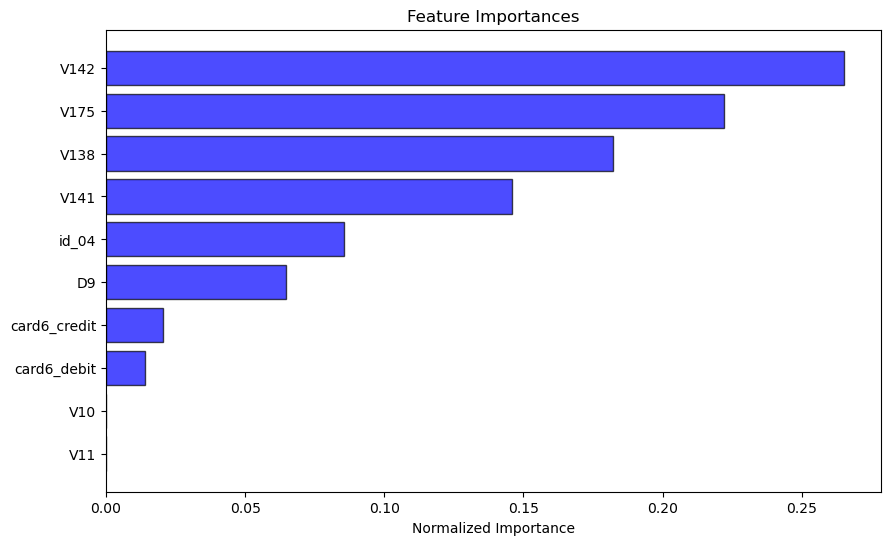

In [27]:
feature_names = train_selected.drop(columns = ['isFraud']).columns
w = classifier.coef_[0]
feature_importance_logit = pd.DataFrame(feature_names, columns = ["feature"])
feature_importance_logit["importance"] = pow(math.e, w)
feature_importance_logit = feature_importance_logit.sort_values(by = ["importance"], ascending=True).head(10)
feature_importances_sorted = plot_feature_importances(feature_importance_logit)

### 4.2.2. SVM 

#### 4.2.2.1. Build and Train SVM

In [28]:
svm = LinearSVC()
svm.fit(x_train, y_train)
svm_y_pred = svm.predict(x_test)

#### 4.2.2.2. Evaluate the model

In [29]:
svm_log_accuracy=accuracy_score(y_test, svm_y_pred)
svm_log_recall=recall_score(y_test, svm_y_pred)
svm_log_precision=precision_score(y_test, svm_y_pred)
svm_log_rocauc=roc_auc_score(y_test, svm_y_pred)

print('{:.4f}'.format(svm_log_accuracy), '- Log Accuracy')
print('{:.4f}'.format(svm_log_recall), '- Log Recall')
print('{:.4f}'.format(svm_log_precision), '- Log Precision')
print('{:.4f}'.format(svm_log_rocauc), '- Log ROC AUC')

0.7168 - Log Accuracy
0.6368 - Log Recall
0.7581 - Log Precision
0.7168 - Log ROC AUC


#### 4.2.2.3. Confusion matrix

In [30]:
svm_confusion_matrix = pd.crosstab(y_test, svm_y_pred)
svm_confusion_matrix

col_0,0,1
row_0,,
0,136204,34739
1,62104,108878


### 4.2.3. Decision trees

#### 4.2.3.1. Build and train D tree

In [31]:
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=5, min_samples_leaf=5)
dtree.fit(x_train, y_train)
dtree_y_pred = dtree.predict(x_test)

#### 4.2.3.2. Evaluate the model

In [32]:
dtree_log_accuracy=accuracy_score(y_test, dtree_y_pred)
dtree_log_recall=recall_score(y_test, dtree_y_pred)
dtree_log_precision=precision_score(y_test, dtree_y_pred)
dtree_log_rocauc=roc_auc_score(y_test, dtree_y_pred)

print('{:.4f}'.format(dtree_log_accuracy), '- Log Accuracy')
print('{:.4f}'.format(dtree_log_recall), '- Log Recall')
print('{:.4f}'.format(dtree_log_precision), '- Log Precision')
print('{:.4f}'.format(dtree_log_rocauc), '- Log ROC AUC')

0.8129 - Log Accuracy
0.7746 - Log Recall
0.8389 - Log Precision
0.8129 - Log ROC AUC


#### 4.2.3.3. Confusion matrix

In [33]:
dtree_confusion_matrix = pd.crosstab(y_test, dtree_y_pred)
dtree_confusion_matrix

col_0,0,1
row_0,,
0,145513,25430
1,38544,132438


#### 4.2.3.4. Visualize the Decision Tree

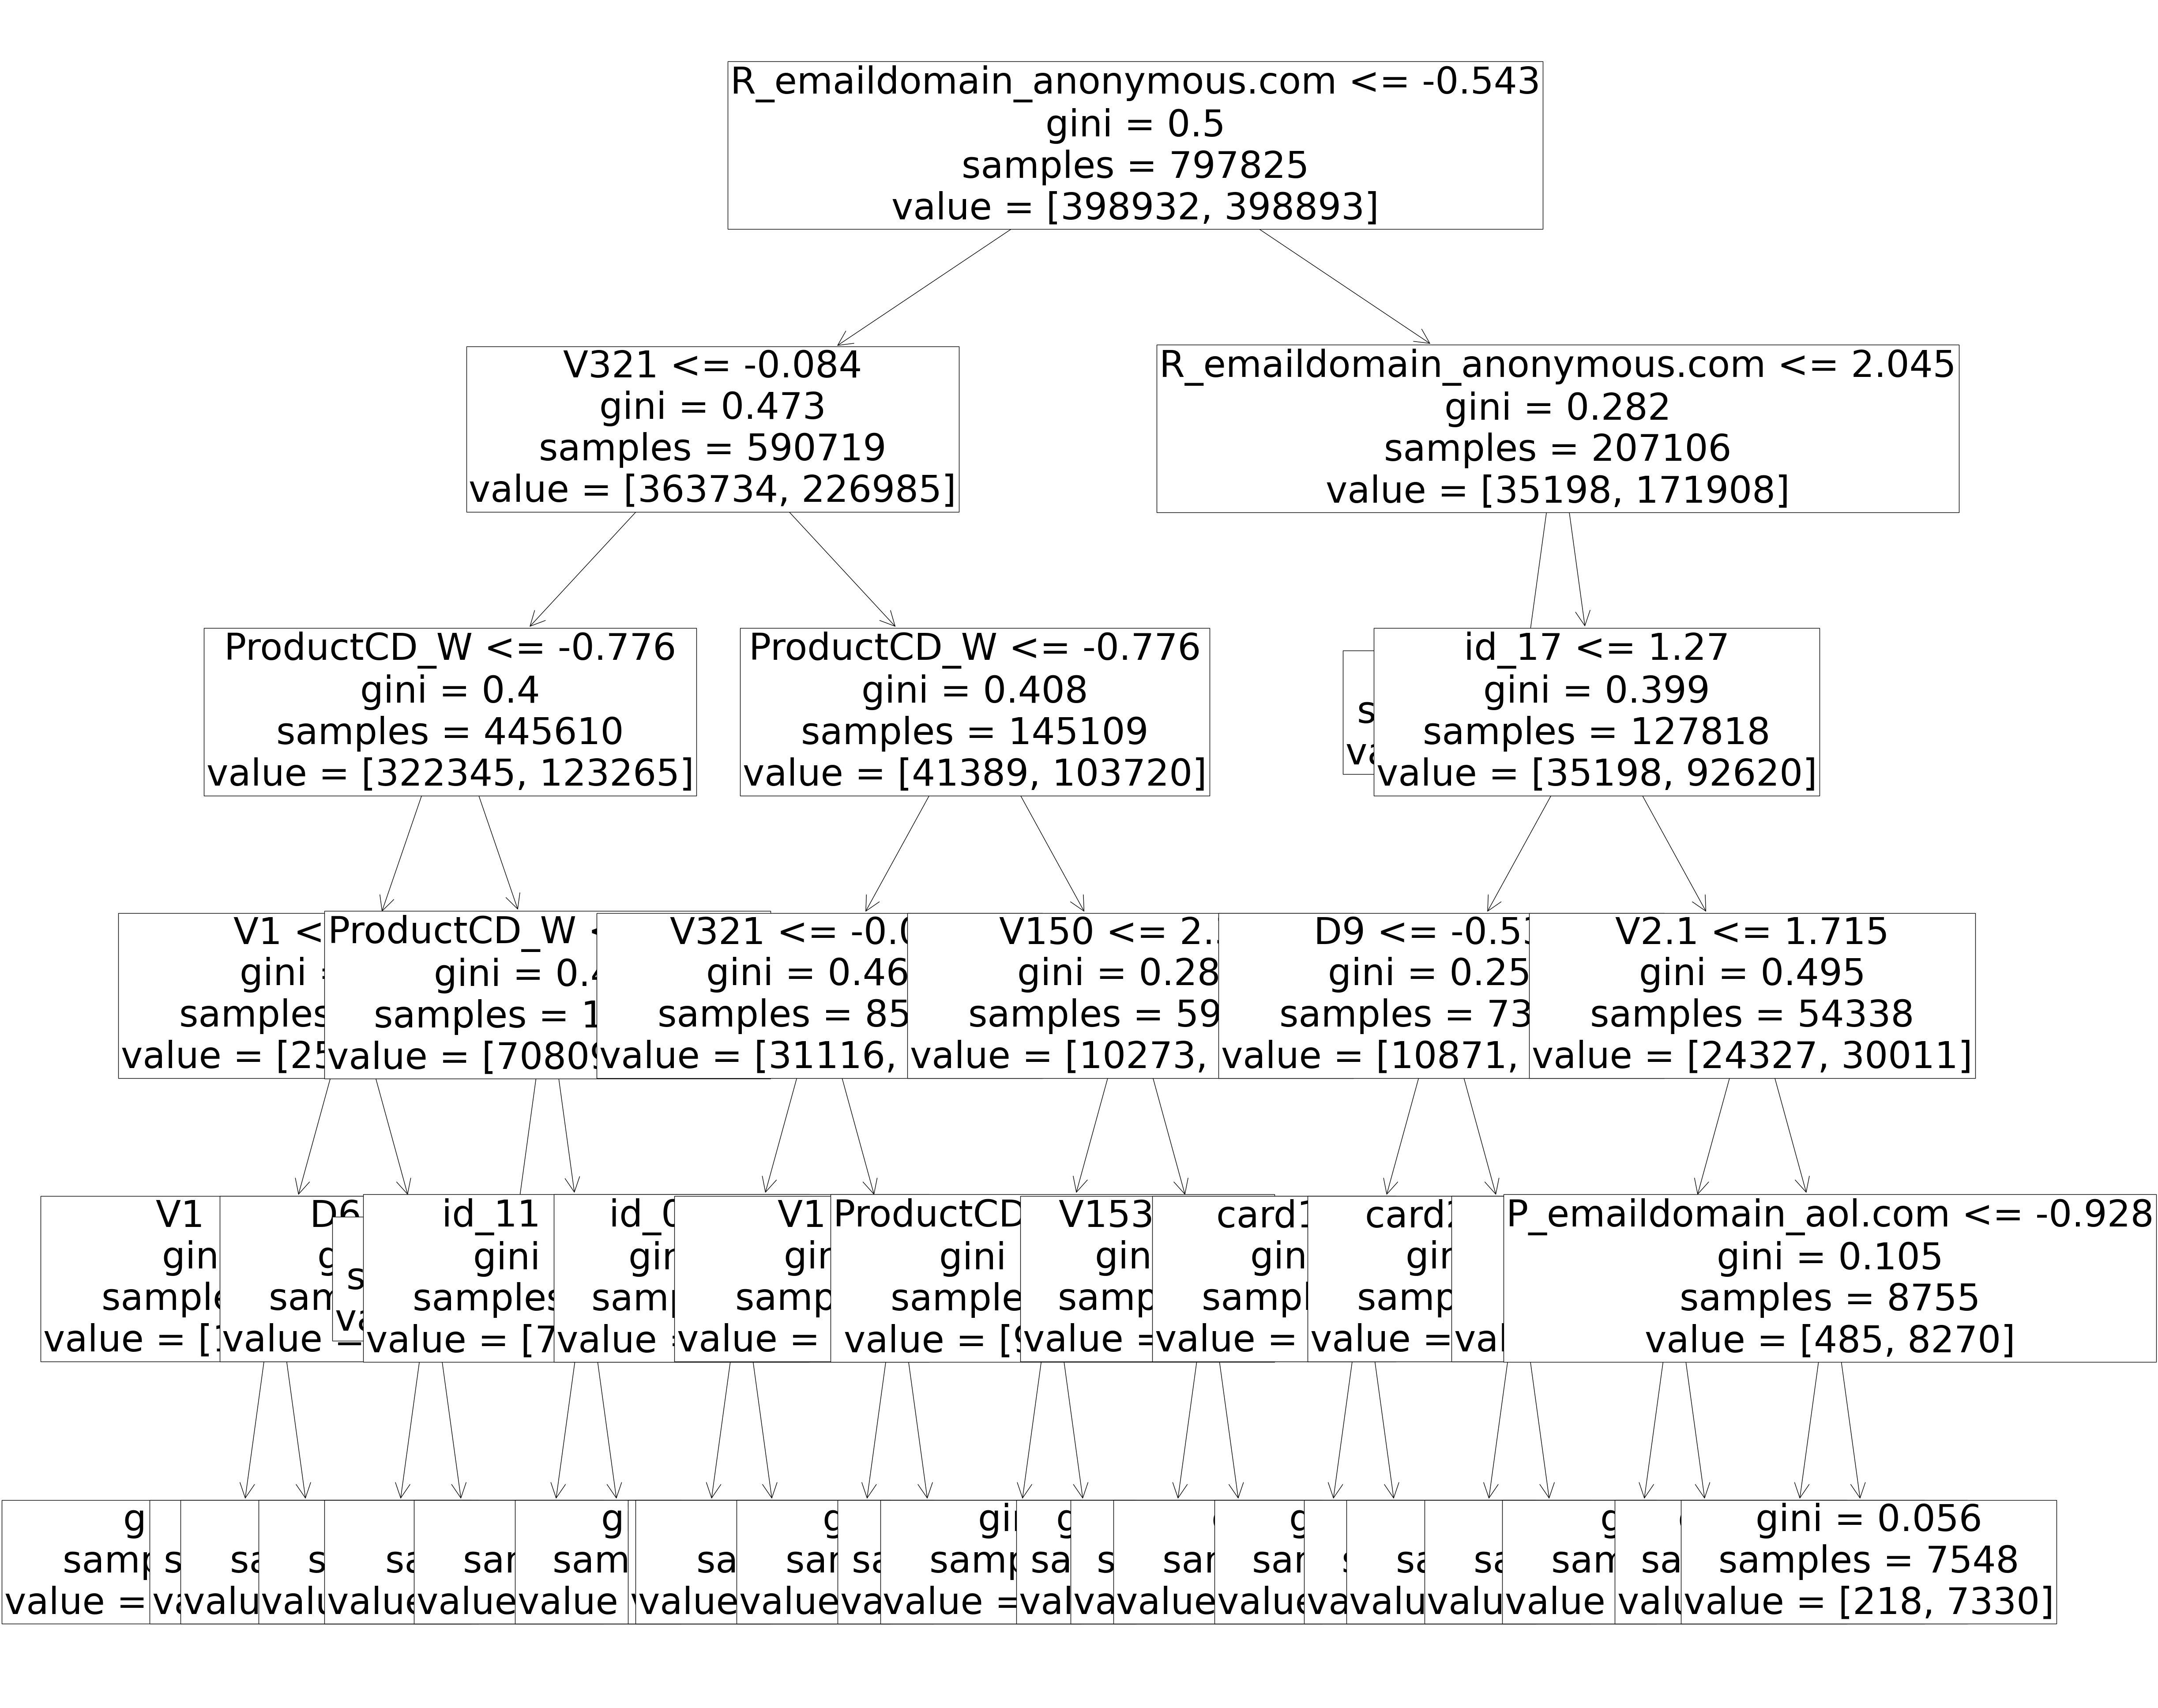

In [34]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
plot_tree(dtree,feature_names=train_selected.columns,fontsize=60);

#### 4.2.3.5. Feature importance for Decision Tree

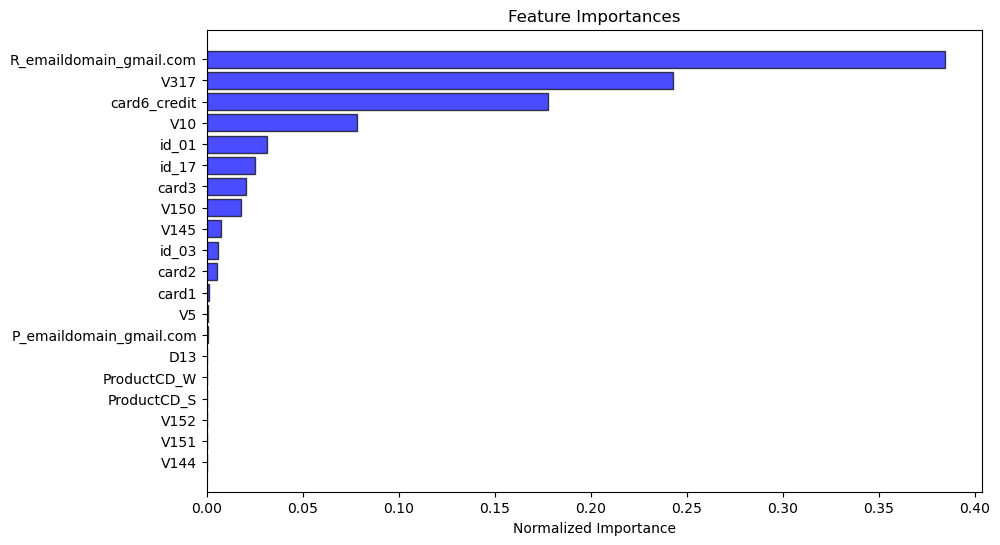

In [35]:
# Get the column of the feature importances
dtree_column_features_names = list(train_selected.drop(columns = ['isFraud']))

# Extract feature importances
feature_importance_values_dtree = dtree.feature_importances_
feature_importance_dtree = pd.DataFrame({'feature': dtree_column_features_names, 'importance': feature_importance_values_dtree})
feature_importances_sorted = plot_feature_importances(feature_importance_dtree)

### 4.2.4. KNN

#### 4.2.4.1. Build and train KNN

In [12]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train, y_train)
knn_y_pred = knn.predict(x_test)

#### 4.2.4.2. Evaluate the model

In [13]:
knn_log_accuracy=accuracy_score(y_test, knn_y_pred)
knn_log_recall=recall_score(y_test, knn_y_pred)
knn_log_precision=precision_score(y_test, knn_y_pred)
knn_log_rocauc=roc_auc_score(y_test, knn_y_pred)

print('{:.4f}'.format(knn_log_accuracy), '- Log Accuracy')
print('{:.4f}'.format(knn_log_recall), '- Log Recall')
print('{:.4f}'.format(knn_log_precision), '- Log Precision')
print('{:.4f}'.format(knn_log_rocauc), '- Log ROC AUC')

0.9417 - Log Accuracy
0.9508 - Log Recall
0.9337 - Log Precision
0.9417 - Log ROC AUC


#### 4.2.4.3. Confusion matrix

In [15]:
#knn_confusion_matrix = confusion_matrix(y_test, knn_y_pred)
#print(knn_confusion_matrix)

knn_confusion_matrix = pd.crosstab(y_test, knn_y_pred)
knn_confusion_matrix

col_0,0,1
row_0,,
0,159405,11538
1,8409,162573


### 4.2.5. Random Forest

#### 4.2.5.1. Build and train Random Forest

In [36]:
# Build the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [37]:
# Merge polynomial features into training dataframe
train_poly = train_selected
target_poly = train_poly['isFraud']

#lets drop it from the poly_train df
train_poly = train_poly.drop(columns = ['isFraud'])

In [38]:
# Train on the training data
random_forest.fit(x_train, y_train)
rndForest_y_pred = random_forest.predict(x_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   53.8s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    1.2s finished


#### 4.2.5.2. Evaluate the model

In [39]:
rndForest_accuracy = accuracy_score(y_test, rndForest_y_pred)
print('{:.4f}'.format(rndForest_accuracy), '- Accuracy')

0.9855 - Accuracy


#### 4.2.5.3. Feature importance for Random Forest

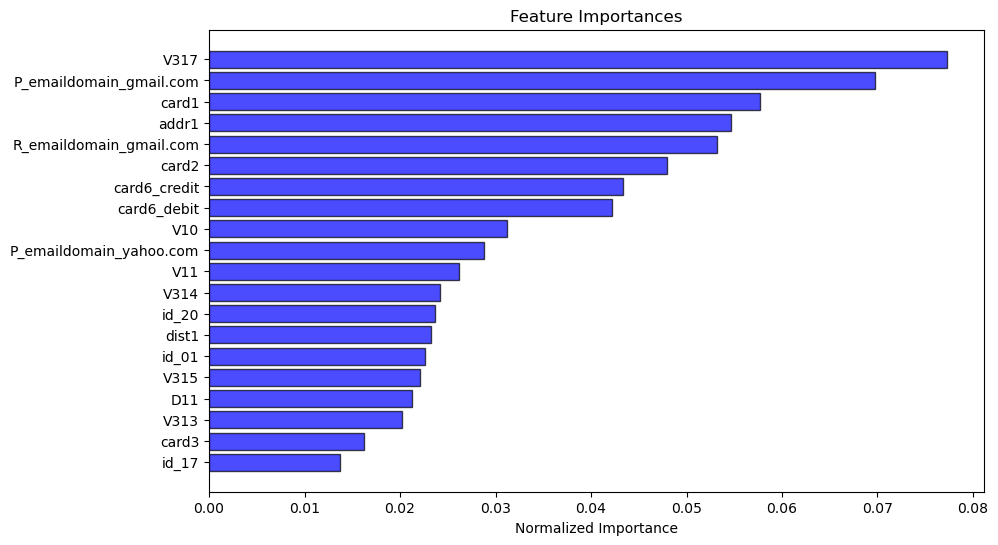

In [40]:
# Get the column of the feature importances
rndForest_column_features_names = list(train_poly.columns)

# Extract feature importances
feature_importance_values_rndForest = random_forest.feature_importances_
feature_importance_rndForest = pd.DataFrame({'feature': rndForest_column_features_names, 'importance': feature_importance_values_rndForest})

# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importance_rndForest)

## 4.3. Visualization of the results and comparision

In [41]:
#Create Table for Model's Evaluation Results
logit_model_score = pd.DataFrame([logit_log_accuracy, logit_log_recall, logit_log_precision, logit_log_rocauc]).T.rename(columns ={0:"Log Accuracy", 1:"Log Recall", 2:"Log Precision", 3: "Log RocAuc"}).rename(index={0: 'logit_model'})
knn_model_score = pd.DataFrame([knn_log_accuracy, knn_log_recall, knn_log_precision, knn_log_rocauc]).T.rename(columns ={0:"Log Accuracy", 1:"Log Recall", 2:"Log Precision", 3: "Log RocAuc"}).rename(index={0: 'knn_model'})
dtree_model_score = pd.DataFrame([dtree_log_accuracy, dtree_log_recall, dtree_log_precision, dtree_log_rocauc]).T.rename(columns ={0:"Log Accuracy", 1:"Log Recall", 2:"Log Precision", 3: "Log RocAuc"}).rename(index={0: 'dtree_model'})
svm_model_score = pd.DataFrame([svm_log_accuracy, svm_log_recall, svm_log_precision, svm_log_rocauc]).T.rename(columns ={0:"Log Accuracy", 1:"Log Recall", 2:"Log Precision", 3: "Log RocAuc"}).rename(index={0: 'svm_model'})

In [44]:
#Merge and name the Model's evaluation results
final_comparison = pd.concat([logit_model_score, knn_model_score,svm_model_score,dtree_model_score ])
final_comparison.rename({"logit_model":"Logistic Regression", "knn_model":"KNN","svm_model":"SVM","dtree_model":"Decision Tree"},inplace=True)
final_comparison = final_comparison.round(6)
final_comparison

,Log Accuracy,Log Recall,Log Precision,Log RocAuc
Logistic Regression,0.713926,0.643477,0.749067,0.713934
KNN,0.941663,0.950819,0.933732,0.941662
SVM,0.716771,0.636780,0.758114,0.716780
Decision Tree,0.812900,0.774573,0.838916,0.812905


[]

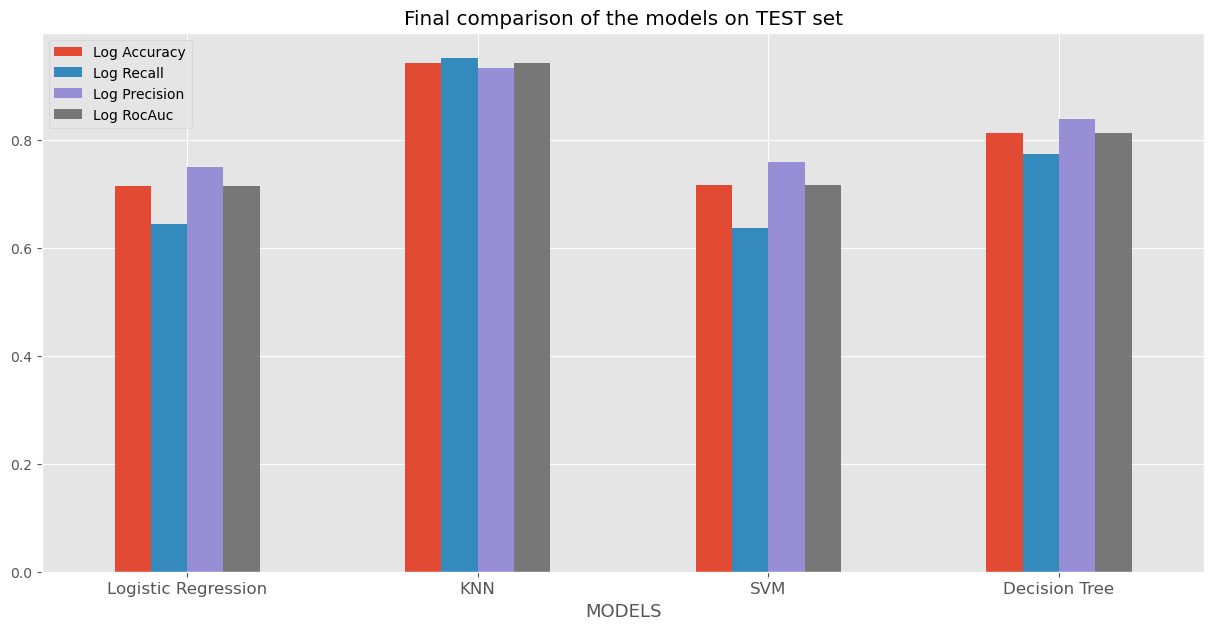

In [45]:
plt.style.use('ggplot')
ax = final_comparison.plot(kind='bar', figsize=(15, 7), title="Final comparison of the models on TEST set")
ax.legend(fontsize=13)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off
ax.set_xticklabels(final_comparison.index, rotation=0, fontsize=12)
ax.set_xlabel("MODELS", fontsize=13)
ax.legend(loc='upper left')
ax.plot()

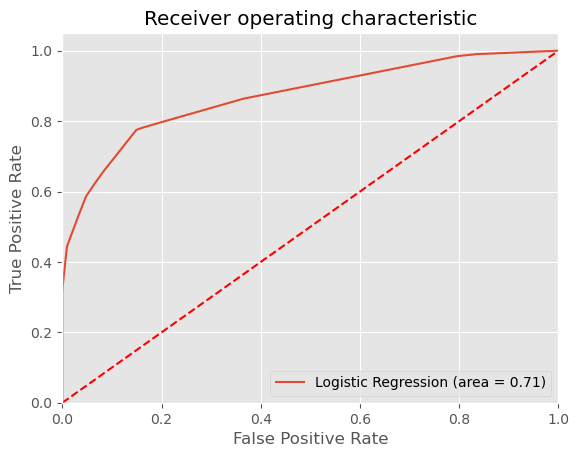

In [105]:
logit_roc_auc = roc_auc_score(y_test, classifier.predict(x_test))
#dtree_roc_auc = roc_auc_score(y_test, dtree.predict(x_test))
#knn_roc_auc = roc_auc_score(y_test, knn.predict(x_test))
#svm_roc_auc = roc_auc_score(y_test, svm.predict(x_test))

fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(x_test)[:,1])
#fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(x_test)[:,1])
#fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(x_test)[:,1])
#fpr, tpr, thresholds = roc_curve(y_test, svm.decision_function(x_test))

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
#plt.plot(fpr, tpr, label='Tree Regression (area = %0.2f)' % dtree_roc_auc)
#plt.plot(fpr, tpr, label='Support Vector Machines (area = %0.2f)' % svm_roc_auc)
#plt.plot(fpr, tpr, label='K-nearest neighbours (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**Comments:**

Based on results in the evaluation table, the KNN and Random Forest models provide the highest score. Logistic Regression and SVM share a similar promising results. However, we decided to proceed and implement the Hyperparameters tuning for each model to see how well they perform after with tuned parameters.

# 5. Hyperparameters tuning

## 5.1. Prepare smaller dataset for HP tuning

Hyperparameters tuning is a machine learning process to find the optimal parameters for each model. For example, n in KNN, C in SVM, and max tree depth in Random Forest.  In this process we will prepare a smaller dataset for tuning  hyperparameters.

In [15]:
#Sample 16000 rows (10000 for training, 6000 for testing) #same dataset as for training the model before
features = train_selected.sample(n = 16000, random_state = 42)
y_feature = features.iloc[:, 0].values
x_feature = features.iloc[:, 1:80].values
smote = SMOTE()
x_feature_smote, y_feature_smote = smote.fit_resample(x_feature, y_feature)

#Scale the data
sc = StandardScaler()
x_feature_smote = sc.fit_transform(x_feature_smote)

#Split into training and testing data
train_features, test_features, train_labels, test_labels = train_test_split(x_feature_smote, y_feature_smote, test_size = .2, random_state = 47)


## 5.2. Hyperparameters tuning for Logistics Regression

In [16]:
#Import all the necesesary stuffs for tuning:
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [18]:
#Get default hyperparameters:
model_logit = LogisticRegression() 
default_params = model_logit.get_params()

In [44]:
#Key Parameters for logistic Regression: 
logit_param_grid = {'C': [10, 1.0, 0.1]}

In [45]:
#Define parameters for Random search:
logit_cv = StratifiedKFold(n_splits=5)
logit_random_search = RandomizedSearchCV(estimator=model_logit, param_distributions = logit_param_grid, n_jobs=-1, cv=logit_cv, scoring='f1', error_score=0)

In [47]:
#Train model:
logit_random_result = logit_random_search.fit(train_features,train_labels)

In [48]:
#Summarize results:
print("Best param: %f using %s" % (logit_random_result.best_score_, logit_random_result.best_params_))
means = logit_random_result.cv_results_['mean_test_score']
stds = logit_random_result.cv_results_['std_test_score']
params = logit_random_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best param: 0.696853 using {'penalty': 'none', 'C': 0.1}
0.000000 (0.000000) with: {'penalty': 'elasticnet', 'C': 1.0}
0.696853 (0.005909) with: {'penalty': 'none', 'C': 0.1}
0.696853 (0.005909) with: {'penalty': 'none', 'C': 100}
0.000000 (0.000000) with: {'penalty': 'elasticnet', 'C': 10}
0.000000 (0.000000) with: {'penalty': 'elasticnet', 'C': 100}
0.000000 (0.000000) with: {'penalty': 'l1', 'C': 0.1}
0.000000 (0.000000) with: {'penalty': 'l1', 'C': 10}
0.696737 (0.006158) with: {'penalty': 'l2', 'C': 10}
0.696853 (0.005909) with: {'penalty': 'none', 'C': 1.0}
0.695753 (0.005636) with: {'penalty': 'l2', 'C': 0.1}


In [57]:
#Retrain and make predicions with model:
new_logit_model = LogisticRegression(C= 0.1, penalty= 'none')
new_logit_model.fit(x_train, y_train)
logit_preds = new_logit_model.predict(x_test)

#Evaulate the model:
new_logit_auc = roc_auc_score(y_test,logit_preds)
print('The new model - scores {:.4f} ROC AUC on the test set.'.format(new_logit_auc))

The new model - scores 0.7135 ROC AUC on the test set.


## 5.3. Hyperparameters tuning for SVM

In [17]:
#Get default hyperparameters:
model_svm = SVC()
default_params = model_svm.get_params()

In [83]:
#Key Parameters for SVM: 
svm_param_grid = {
    'kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
    'gamma': ['scale', 'auto'],
    'C':  [1, 10, 100]
}

In [84]:
#Define parameters for Random search:
svm_cv = StratifiedKFold(n_splits=3)
svm_random_search = RandomizedSearchCV(estimator=model_svm, param_distributions=svm_param_grid, n_jobs=-1, cv=svm_cv, scoring='f1', error_score=0)

In [86]:
#Train the model
svm_random_result = svm_random_search.fit(train_features, train_labels)

In [87]:
#Summarize results:
print("Best param: %f using %s" % (svm_random_result.best_score_, svm_random_result.best_params_))
means = svm_random_result.cv_results_['mean_test_score']
stds = svm_random_result.cv_results_['std_test_score']
params = svm_random_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))  

Best param: 0.931309 using {'kernel': 'rbf', 'gamma': 'auto', 'C': 100}
0.628158 (0.001633) with: {'kernel': 'sigmoid', 'gamma': 'scale', 'C': 100}
0.871809 (0.004084) with: {'kernel': 'poly', 'gamma': 'auto', 'C': 10}
0.931309 (0.001262) with: {'kernel': 'rbf', 'gamma': 'auto', 'C': 100}
0.843514 (0.000333) with: {'kernel': 'rbf', 'gamma': 'auto', 'C': 1}
0.700866 (0.001980) with: {'kernel': 'linear', 'gamma': 'auto', 'C': 100}
0.906043 (0.001028) with: {'kernel': 'rbf', 'gamma': 'auto', 'C': 10}
0.930943 (0.001502) with: {'kernel': 'rbf', 'gamma': 'scale', 'C': 100}
0.630971 (0.002747) with: {'kernel': 'sigmoid', 'gamma': 'auto', 'C': 1}
0.628414 (0.001408) with: {'kernel': 'sigmoid', 'gamma': 'scale', 'C': 10}
0.870868 (0.002075) with: {'kernel': 'poly', 'gamma': 'scale', 'C': 10}


In [ ]:
#Retrain and make predicions with model:
new_svm_model = SVC(kernel= 'rbf', gamma= 'auto', C= 100)
new_svm_model.fit(x_train, y_train)
svm_preds = new_svm_model.predict(x_test)

Kernel 'rbf'in SVC is the most complex kernel, which is a greedy parameter related to time-running. Besides that, the higher C-value, the more time-consuming for the model.

Unfortunately, the above procedure takes too much time to proceed, per our situtaion is more than 8 hours.

In [ ]:
#Evaulate the model:
new_svm_auc = roc_auc_score(y_test,svm_preds)
print('The new model - scores {:.4f} ROC AUC on the test set.'.format(new_svm_auc))


## 5.4. Hyperparameter tuning for KNN

In [21]:
# Get default hyperparameters
model_knn = KNeighborsClassifier()
default_params = model_knn.get_params()

In [22]:
#Key Parameters for KNN: 
knn_param_grid = {
    'n_neighbors': list(range(5, 30, 5)),
    'weights': ['distance'],
    'metric':  ['minkowski']
}

In [23]:
#Define parameters for Random search:
knn_cv = StratifiedKFold(n_splits=3)
knn_random_search = RandomizedSearchCV(estimator=model_knn, param_distributions=knn_param_grid, n_jobs=-1, cv=knn_cv, scoring='f1', error_score=0)

In [24]:
#Train the model
knn_random_result = knn_random_search.fit(train_features, train_labels)

In [25]:
#Summarize results:
print("Best param: %f using %s" % (knn_random_result.best_score_, knn_random_result.best_params_))
means = knn_random_result.cv_results_['mean_test_score']
stds = knn_random_result.cv_results_['std_test_score']
params = knn_random_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))  

Best param: 0.943947 using {'weights': 'distance', 'n_neighbors': 5, 'metric': 'minkowski'}
0.943947 (0.001827) with: {'weights': 'distance', 'n_neighbors': 5, 'metric': 'minkowski'}
0.929324 (0.002227) with: {'weights': 'distance', 'n_neighbors': 10, 'metric': 'minkowski'}
0.918309 (0.001777) with: {'weights': 'distance', 'n_neighbors': 15, 'metric': 'minkowski'}
0.909545 (0.001401) with: {'weights': 'distance', 'n_neighbors': 20, 'metric': 'minkowski'}
0.902646 (0.001467) with: {'weights': 'distance', 'n_neighbors': 25, 'metric': 'minkowski'}


In [26]:
#Retrain and make predicions with model:
new_knn_model = KNeighborsClassifier(metric = 'minkowski', n_neighbors = 5, weights= 'distance')
new_knn_model.fit(x_train, y_train)
knn_preds = new_knn_model.predict(x_test)


In [27]:
#Evaulate the model:
new_knn_auc = roc_auc_score(y_test,knn_preds)
print('The new model - scores {:.4f} ROC AUC on the test set.'.format(new_knn_auc))


The new model - scores 0.9642 ROC AUC on the test set.


## 5.5. Hyperparameter tuning for Decision Tree

In [19]:
# Get default hyperparameters
model_dtree = DecisionTreeClassifier()
default_params = model_dtree.get_params()

In [72]:
#Key Parameters for Decision Tree: 
dtree_param_grid = {
    'criterion': ["gini", "entropy", "log_loss"],
    'max_depth': list(np.linspace(1, 32, 32, endpoint=True)),
    'min_samples_leaf': list(np.linspace(0.1, 0.5, 5, endpoint=True)),
    'min_samples_split':  list(np.linspace(0.1, 1.0, 10, endpoint=True)),
}

In [73]:
#Define Random search:
dtree_cv = StratifiedKFold(n_splits=3)
dtree_random_search = RandomizedSearchCV(estimator=model_dtree, param_distributions=dtree_param_grid, n_jobs=-1, cv=dtree_cv, scoring='f1', error_score=0)

In [77]:
dtree_random_result = dtree_random_search.fit(train_features, train_labels)

In [80]:
#Summarize results:
print("Best param: %f using %s" % (dtree_random_result.best_score_, dtree_random_result.best_params_))
means = dtree_random_result.cv_results_['mean_test_score']
stds = dtree_random_result.cv_results_['std_test_score']
params = dtree_random_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best param: 0.778448 using {'min_samples_split': 0.2, 'min_samples_leaf': 0.1, 'max_depth': 21.0, 'criterion': 'entropy'}
0.704675 (0.002927) with: {'min_samples_split': 0.2, 'min_samples_leaf': 0.2, 'max_depth': 26.0, 'criterion': 'gini'}
0.000000 (0.000000) with: {'min_samples_split': 0.1, 'min_samples_leaf': 0.2, 'max_depth': 7.0, 'criterion': 'log_loss'}
0.767419 (0.001650) with: {'min_samples_split': 0.4, 'min_samples_leaf': 0.1, 'max_depth': 27.0, 'criterion': 'gini'}
0.704675 (0.002927) with: {'min_samples_split': 0.30000000000000004, 'min_samples_leaf': 0.30000000000000004, 'max_depth': 32.0, 'criterion': 'entropy'}
0.704675 (0.002927) with: {'min_samples_split': 0.8, 'min_samples_leaf': 0.2, 'max_depth': 2.0, 'criterion': 'gini'}
0.704675 (0.002927) with: {'min_samples_split': 1.0, 'min_samples_leaf': 0.30000000000000004, 'max_depth': 18.0, 'criterion': 'gini'}
0.704675 (0.002927) with: {'min_samples_split': 0.2, 'min_samples_leaf': 0.2, 'max_depth': 18.0, 'criterion': 'entrop

In [81]:
#Retrain and make predicions with model:
new_dtree_model = DecisionTreeClassifier(min_samples_split= 0.2, min_samples_leaf= 0.1, max_depth = 21.0, criterion= 'entropy')
new_dtree_model.fit(x_train, y_train)
dtree_preds = new_dtree_model.predict(x_test)


#Evaulate the model:
new_dtree_auc = roc_auc_score(y_test,dtree_preds)
print('The new model - scores {:.4f} ROC AUC on the test set.'.format(new_dtree_auc))

The new model - scores 0.7509 ROC AUC on the test set.


## 5.6. Hyperparameter tuning for Random Forest

In [20]:
# Get default hyperparameters:
model_rndForest = RandomForestClassifier()
default_params = model_rndForest.get_params()

In [60]:
#Key Parameters for Random Forest: 
rndForest_param_grid = {
    'criterion': ["gini", "entropy", "log_loss"],
    'max_depth': list(np.linspace(1, 32, 32, endpoint=True)),
    'min_samples_leaf': list(np.linspace(0.1, 0.5, 5, endpoint=True)),
    'min_samples_split':  list(np.linspace(0.1, 1.0, 10, endpoint=True)),
}

In [ ]:
#Define Random search:
rndForest_cv = StratifiedKFold(n_splits=3)
rndForest_random_search = RandomizedSearchCV(estimator=model_rndForest, param_distributions=rndForest_param_grid, n_jobs=-1, cv=rndForest_cv, scoring='f1', error_score=0)
rndForest_random_result = rndForest_random_search.fit(train_features, train_labels)

In [61]:
rndForest_cv = StratifiedKFold(n_splits=3)

In [62]:
rndForest_random_search = RandomizedSearchCV(estimator=model_rndForest, param_distributions=rndForest_param_grid, n_jobs=-1, cv=rndForest_cv, scoring='f1', error_score=0)

In [64]:
rndForest_random_result = rndForest_random_search.fit(train_features, train_labels)

In [65]:
#Summarize results:
print("Best param: %f using %s" % (rndForest_random_result.best_score_, rndForest_random_result.best_params_))
means = rndForest_random_result.cv_results_['mean_test_score']
stds = rndForest_random_result.cv_results_['std_test_score']
params = rndForest_random_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))    

Best param: 0.667545 using {'min_samples_split': 0.5, 'min_samples_leaf': 0.2, 'max_depth': 10.0, 'criterion': 'gini'}
0.667545 (0.007468) with: {'min_samples_split': 0.5, 'min_samples_leaf': 0.2, 'max_depth': 10.0, 'criterion': 'gini'}
0.000000 (0.000000) with: {'min_samples_split': 1.0, 'min_samples_leaf': 0.1, 'max_depth': 6.0, 'criterion': 'log_loss'}
0.000000 (0.000000) with: {'min_samples_split': 0.7000000000000001, 'min_samples_leaf': 0.1, 'max_depth': 32.0, 'criterion': 'gini'}
0.000000 (0.000000) with: {'min_samples_split': 1.0, 'min_samples_leaf': 0.2, 'max_depth': 10.0, 'criterion': 'entropy'}
0.000000 (0.000000) with: {'min_samples_split': 0.2, 'min_samples_leaf': 0.1, 'max_depth': 17.0, 'criterion': 'log_loss'}
0.000000 (0.000000) with: {'min_samples_split': 0.8, 'min_samples_leaf': 0.1, 'max_depth': 16.0, 'criterion': 'entropy'}
0.000000 (0.000000) with: {'min_samples_split': 0.9, 'min_samples_leaf': 0.5, 'max_depth': 26.0, 'criterion': 'gini'}
0.000000 (0.000000) with: {

In [69]:
#Retrain and make predicions with model:
new_rndForest_model = RandomForestClassifier(min_samples_split= 0.5, min_samples_leaf = 0.2, max_depth= 10.0, criterion='gini',verbose = 1)
new_rndForest_model.fit(x_train, y_train)
rndForest_preds = new_rndForest_model.predict(x_test)


In [70]:
#Evaulate the model:
new_rndForest_auc = roc_auc_score(y_test,rndForest_preds)
print('The new model - scores {:.4f} ROC AUC on the test set.'.format(new_rndForest_auc))

The new model - scores 0.6637 ROC AUC on the test set.


# 6. Model Comparisions and Conclusion 

In [40]:
#Create Table for Model's Evaluation Results
new_logit_model_score = pd.DataFrame([new_logit_auc]).T.rename(columns ={0: "Log RocAuc"}).rename(index={0: 'new_logit_model'})
new_knn_model_score = pd.DataFrame([new_knn_auc]).T.rename(columns ={0:"Log RocAuc"}).rename(index={0: 'new_knn_model'})
#new_svm_model_score = pd.DataFrame([new_svm_auc]).T.rename(columns ={0:"Log RocAuc"}).rename(index={0: 'new_svm_model'})
new_dtree_model_score = pd.DataFrame([new_dtree_auc]).T.rename(columns ={0:"Log RocAuc"}).rename(index={0: 'new_dtree_model'})
new_rndForest_model_score = pd.DataFrame([new_rndForest_auc]).T.rename(columns ={0:"Log RocAuc"}).rename(index={0: 'new_rndForest_model'})

In [41]:
#Merge and name the Model's evaluation results
tuning_comparison = pd.concat([new_logit_model_score, new_knn_model_score, new_dtree_model_score, new_rndForest_model_score])
tuning_comparison.rename({"new_logit_model":"Logistic Regression", "new_knn_model":"KNN", "new_dtree_model":"Decision Tree", "new_rndForest_model":"Random Forest"},inplace=True)
tuning_comparison = tuning_comparison.round(4)
tuning_comparison

,Log RocAuc
Logistic Regression,0.7135
KNN,0.9642
Decision Tree,0.7509
Random Forest,0.6637


[]

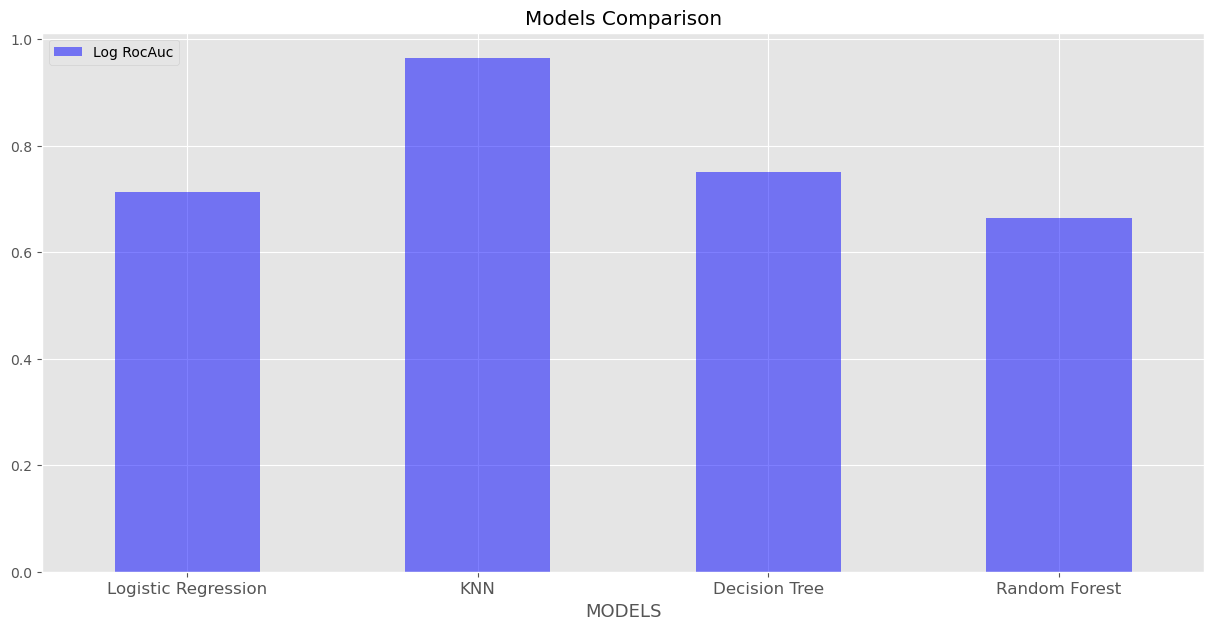

In [42]:
plt.style.use('ggplot')
ax = tuning_comparison.plot(kind='bar', figsize=(15, 7), title="Models Comparison", color = 'b', alpha = 0.5)
ax.legend(fontsize=13)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off
ax.set_xticklabels(tuning_comparison.index, rotation=0, fontsize=12)
ax.set_xlabel("MODELS", fontsize=13)
ax.legend(loc='upper left')
ax.plot()

***Conclusion:***

And the winner is: ***KNN*** 

More detail summary based on our model score graph:
1. Logistic Regression barely provides any improvement after Hyperparameters tuning.
2. KNN has a slight imporvement after Hyperparameters tuning
3. SVM shows a relative high score in Hyperparameters tuning, but unfortunately we couldn't perform the model re-train due to time limitation. We believe if we re-trained SVM, it will be more likely a promising competitor for the winner.